# Challenge: Preparing a House Prices dataset for modeling
Using a House Prices dataset, I select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. I'll explore the variables using the univariate and bivariate methods.

Next, using data exploration, I'll create ten new features and explain the reasoning behind each one.

Finally, I'll use filtering methods to select the five best features and justify my choices.

# 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [3]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\house_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The dataset contains 81 variables and 1460 entries. So what do we consider when we plan to buy houses? I also need to pick up to 2 categorical and up to 4 continuous variables as challenge requirements. 

## 1.1 Exploring the data: Univariate
As I'm modeling this dataset to predict the house prices, SalePrice will be my single dependant variable which I'll focus on. 

C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


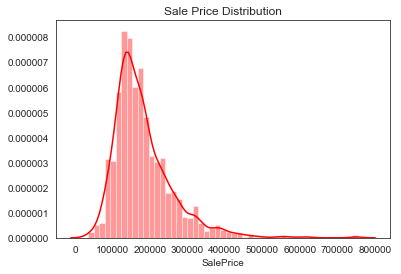

In [4]:
# check the SalePrice distribution
_ = sns.distplot(df['SalePrice'], color = 'r')
_.set(title = 'Sale Price Distribution')
plt.show()

The figure shows that the SalePrice is pretty much normally-distributed. It has positive skewness and shows peakedness.

## 1.2 Exploring the data: Multivariate
Next, I'll examine the pairwise relationships among the data. I need to identify the variables which are highly-positively correlated with the SalePrice. In other words, which factors can impact SalePrice to change. I would not use my intuition instead, I visualize a correlation matrix to make my decisions faster.
   ### 1.2.1 For all continuous variables:

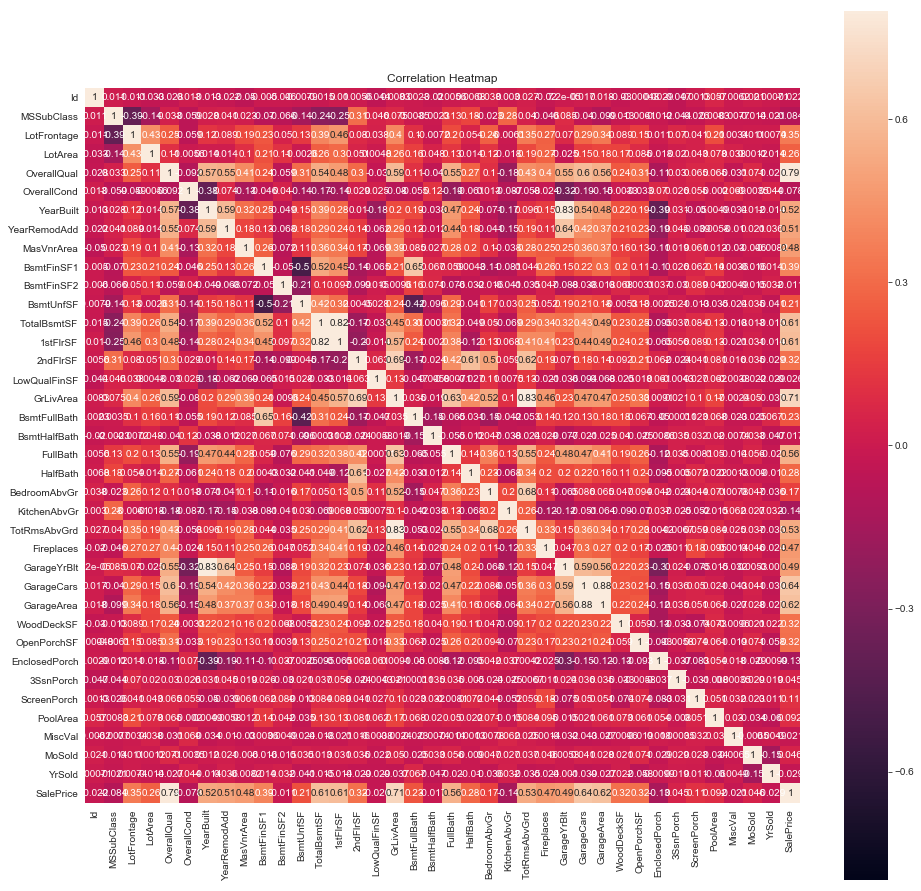

In [5]:
# make correlation matrix
df_corr = df.corr()

# Plot heatmap of correlations
fig, ax = plt.subplots(figsize = (16,16))
_ = sns.heatmap(df_corr, square = True, annot = True, vmin = -0.8, vmax = 0.8)
_.set(title = 'Correlation Heatmap')
plt.show()

The above plotted correlation matrix shows that when people buy houses, they consider how big is the house is (TotalBsmtSF), what is the size of living area (GrLivArea), how many cars can they put in the garage (GarageCars), how big is the garage (GarageArea), Full bathrooms above grade, how big is the 1st floor (1stFlrSF) and the overall quality of the house (OveralQual)

I'll use these variable for further calculations. But before moving on, I'll reduce the number of variables. 
 - The number of cars fitting to the garage depends on the are of the garage. We can also observe this correleation from the heatmap (.88). So, SalePrice has relatively higher correlation with GarageCars (.64) rather GarageArea (.62). I'll keep GarageCars variable. 
 - The same situation occurs between the 1st floor area and total area. They are also highly positively correlated (0.82) and show the same degree of correlation with SalePrice (both 0.61). I'm going to continue with TotalBsmtSF variable.


In [6]:
# create a dataframe to hold selected features
subset = df[['Street', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'OverallQual', 'SalePrice']].copy()

# check for missing values
total = subset.isnull().sum().sort_values(ascending=False)
percent = (subset.isnull().sum()/subset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SalePrice,0,0.0
OverallQual,0,0.0
GarageArea,0,0.0
GrLivArea,0,0.0
TotalBsmtSF,0,0.0
Street,0,0.0


In [7]:
subset.describe()

,TotalBsmtSF,GrLivArea,GarageArea,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1057.429452,1515.463699,472.980137,6.099315,180921.195890
std,438.705324,525.480383,213.804841,1.382997,79442.502883
min,0.000000,334.000000,0.000000,1.000000,34900.000000
25%,795.750000,1129.500000,334.500000,5.000000,129975.000000
50%,991.500000,1464.000000,480.000000,6.000000,163000.000000
75%,1298.250000,1776.750000,576.000000,7.000000,214000.000000
max,6110.000000,5642.000000,1418.000000,10.000000,755000.000000


In [8]:
# to better see all the points, I create a dataframe of random noise and add it only when plotting.
df_jittered = subset.loc[:, 'TotalBsmtSF':'SalePrice']

# create random noise
noise = pd.DataFrame(np.random.uniform(-0.1, 0.1, size = (df_jittered.shape)), columns = df_jittered.columns)

# combine the data and noise
df_jittered = df_jittered.add(noise)
df_jittered.head()

,TotalBsmtSF,GrLivArea,GarageArea,OverallQual,SalePrice
0,856.090919,1709.958851,547.951194,6.941781,208500.005700
1,1261.909001,1262.016400,460.040946,6.049611,181499.997183
2,919.992427,1785.935367,607.969445,6.917511,223500.061795
3,756.047652,1717.045450,641.959091,7.063278,140000.007304
4,1144.938498,2197.972976,836.004883,8.036448,250000.009773


<function matplotlib.pyplot.show(*args, **kw)>

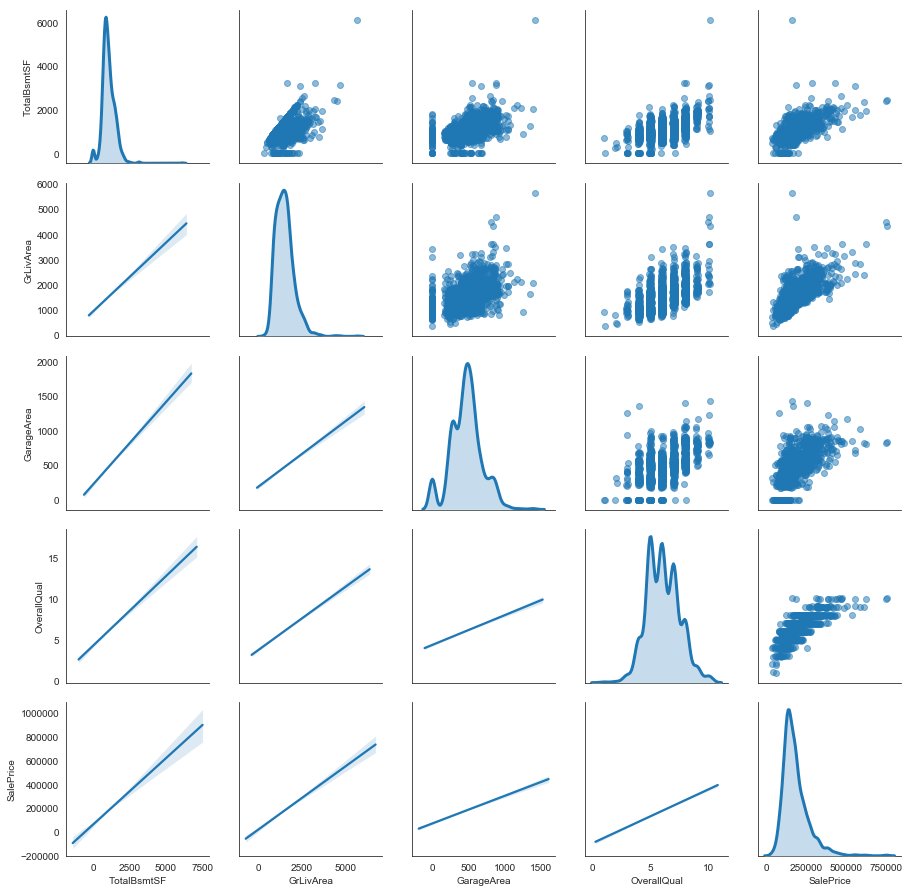

In [9]:
# declare that I want to make a scatterplot matrix
_ = sns.PairGrid(df_jittered.dropna(), diag_sharey = False)

# Scatter plot
_.map_upper(plt.scatter, alpha = 0.5)

# Linear relationship of two variables
_.map_lower(sns.regplot, scatter_kws = dict(alpha = 0))

# Add kernel density distribution of single variable (univariate distribution)
_.map_diag(sns.kdeplot, lw = 3, shade = True)
plt.show

If we look at the first row of the second columns, there is a line painted by dots showing linear realtionship between TotalBsmtSF and GrLivArea and most of the dots stay below that line. This means that ground living areas can be larger than ground living area and equal to, but not smaller.

### 1.2.2 For a continuous and a categorical pair:
Boxplots are very useful and informative for visualisation of the continuous variable for each value of the categorical variable. 

C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


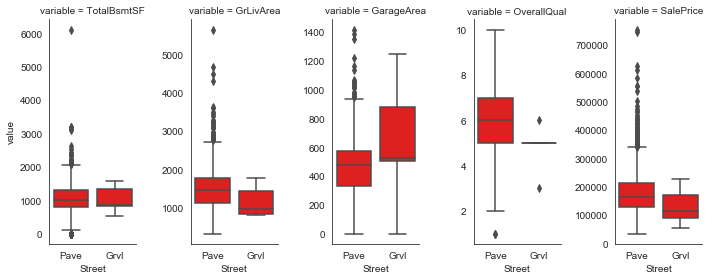

               GarageArea    GrLivArea  OverallQual      SalePrice  \
Street                                                               
Grvl   count     6.000000     6.000000     6.000000       6.000000   
       mean    632.000000  1154.666667     4.833333  130190.500000   
       std     436.141720   420.079358     0.983192   65446.253991   
       min       0.000000   816.000000     3.000000   55993.000000   
       25%     507.000000   835.500000     5.000000   88250.000000   
       50%     522.500000   969.000000     5.000000  114250.000000   
       75%     878.500000  1440.000000     5.000000  169650.000000   
       max    1248.000000  1786.000000     6.000000  228950.000000   
Pave   count  1454.000000  1454.000000  1454.000000    1454.000000   
       mean    472.323934  1516.952545     6.104539  181130.538514   
       std     212.466109   525.473949     1.382247   79446.597317   
       min       0.000000   334.000000     1.000000   34900.000000   
       25%     331.5

In [10]:
# restructure the data so we can use FacetGrid. I'll take only two clubs from Seria A 
df_rest = pd.melt(subset, id_vars = ['Street'])
df_rest['value'] = df_rest['value'].astype(float)

_ = sns.FacetGrid(df_rest, col = 'variable', size = 4, aspect = 0.5, col_wrap=5, sharey = False)
_ = _.map(sns.boxplot, 'Street', 'value', color = 'r')
plt.show()

# Descriptive statistics by group.
print(subset.groupby('Street').describe().stack())

# Test whether group differences are significant.
for col in subset.loc[:,'TotalBsmtSF':'SalePrice'].columns:
    print(col)
    print(stats.ttest_ind(
        subset[subset['Street'] == 'Pave'][col].dropna(),
        subset[subset['Street'] == 'Grvl'][col].dropna()))

Boxplots show that we have a critical number of outliers which we need to deal with later. However, the last figure depicts that the median SalePrice for paved road access is higher than the median for gravel road access

# 1.3 Outliers
From above plotted visuals we already know that our dataset has outliers. I'll use Z-score method to remove them.

In [11]:
# calculate z-score
subset_num = subset.loc[:,'TotalBsmtSF':'SalePrice']
z = np.abs(stats.zscore(subset_num))
print(z)

[[0.45930254 0.37033344 0.35100032 0.65147924 0.34727322]
 [0.46646492 0.48251191 0.06073101 0.07183611 0.00728832]
 [0.31336875 0.51501256 0.63172623 0.65147924 0.53615372]
 ...
 [0.21564122 1.56964722 1.03391416 0.65147924 1.07761115]
 [0.04690528 0.83278768 1.09005935 0.79515147 0.48852299]
 [0.45278362 0.49393395 0.9216238  0.79515147 0.42084081]]


In [12]:
# while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. 
# These data points which are way too far from zero will be treated as the outliers.
# In most of the cases a threshold of 3 is used to identify the outliers.
threshold = 3
subset_o = subset[(z < threshold).all(axis=1)]
print(subset.shape)
print(subset_o.shape)

(1460, 6)
(1420, 6)


Using Z-score method, I removed 40 rows of outliers. let's check again for outliers.

C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


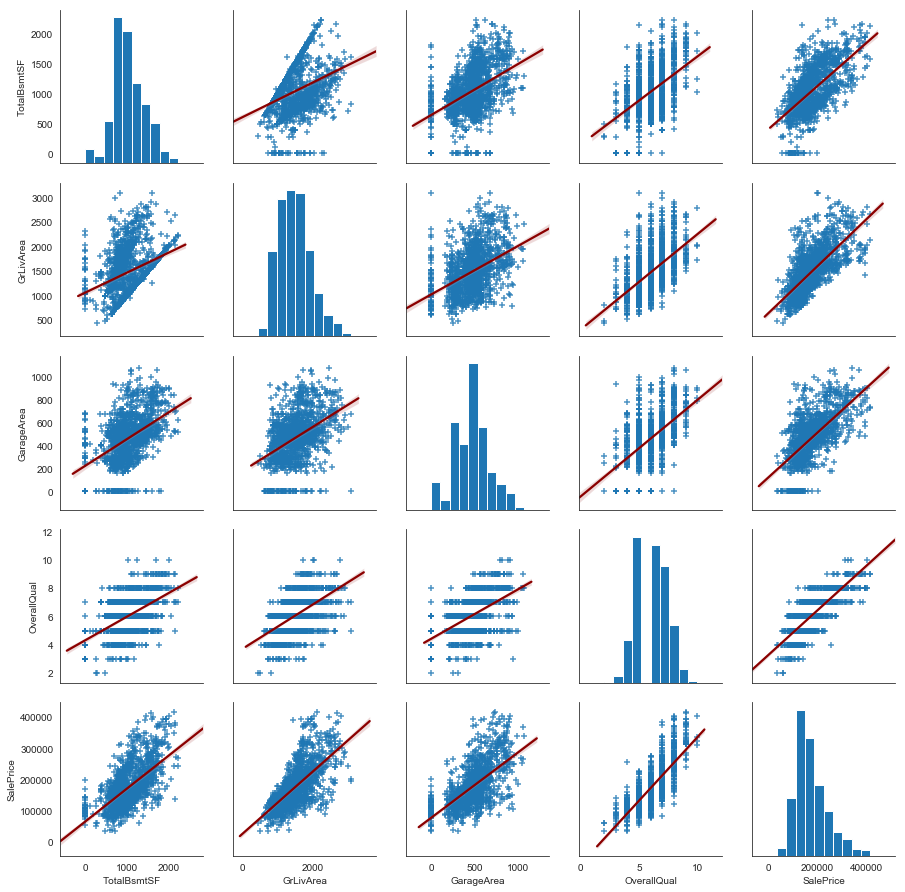

In [24]:
# pairplot
_ = sns.pairplot(subset_o, height = 2.5, kind = 'reg', markers="+", plot_kws={'line_kws':{'color':'darkred'}})
plt.show()

# 2. Feature selection
Explarotary analysis helped me to identify some useful features. I'm going to add 4 more features and filter the later to contuniue with the 5 most important ones. 
## 2.1 Categorical variable as  a feature
I think people consider the type of building when they plan to buy house. I'll examine BldgType categorical variable whether to select any of them as a feature. 

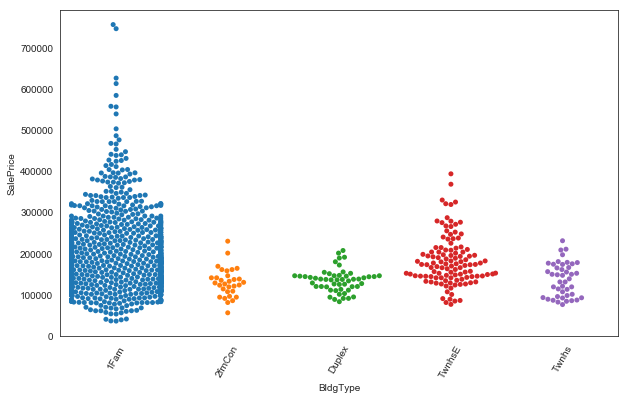

In [26]:
# countplot Building Types
fig, ax = plt.subplots(figsize = (10, 6))
sns.swarmplot(x = 'BldgType', y = 'SalePrice', data = df)
plt.xticks(rotation = 60)
plt.show()

In [15]:
# create dataframe to hold the features
features = pd.get_dummies(df['BldgType'])

## 2.2 Principial Component Analysis (PCA)

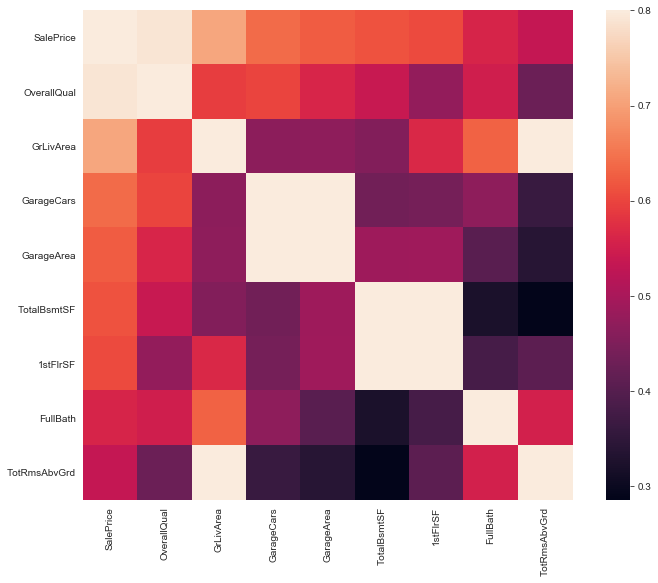

In [16]:
# I already have correlation matrix calculated. Let's get first 10 highest correlated variables with SalePrice
corr_9 = df_corr.nlargest(9, 'SalePrice')['SalePrice'].index
corrmat = np.corrcoef(df[corr_9].values.T)
fig, ax = plt.subplots(figsize = (12,9))
_ = sns.heatmap(corrmat, square = True, vmax=.8, xticklabels=corr_9.values, yticklabels=corr_9.values)


Next, I would like to combine variables and create new features using a Principal Components Analysis ("PCA"). It reduces the correlated set of variables into a smaller set of uncorrelated features. PCA works best with normally-distributed data and assumes the relatioships among variables are linear.

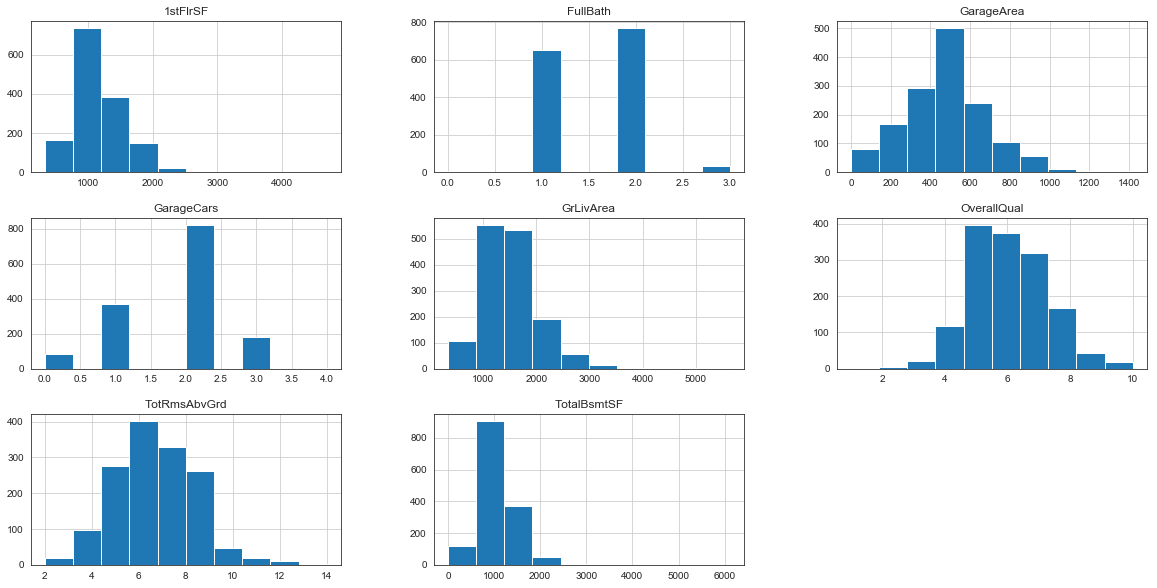

In [17]:
# Take a subset of the data for PCA and drop missing values because PCA cannot handle them. 
for col in ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']:
    features[col] = df.loc[:, col]
    
# check the normality of variable distributions
plot_norm = features.loc[:, 'OverallQual':'TotRmsAbvGrd']
plot_norm.hist(figsize = (20, 10))
plt.show()

Except for FullBath, GarageCars, most variables are normally distributed. From EDA we already decided that the GarageArea can be substitude for GarageCars. So, I'll drop this variable. Also, I'll combine TotRms, 1stFlrSF and FullBath features.

In [18]:
# for PCA I'll drop missing values because PCA cannot handle them
features_pca = features[['TotRmsAbvGrd', '1stFlrSF', 'FullBath']].dropna()

# normalize the variables
means = features_pca.mean(axis=0)
stds = features_pca.std(axis=0)
features['Combined'] = ((features_pca - means) / stds).mean(axis=1)

# check the correlation
corrmat2 = features[['TotRmsAbvGrd', '1stFlrSF', 'FullBath', 'Combined']].corr()
print(corrmat2)

              TotRmsAbvGrd  1stFlrSF  FullBath  Combined
TotRmsAbvGrd      1.000000  0.409516  0.554784  0.823487
1stFlrSF          0.409516  1.000000  0.380637  0.750480
FullBath          0.554784  0.380637  1.000000  0.811380
Combined          0.823487  0.750480  0.811380  1.000000


In [27]:
# remove unselected variables
features = features.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath'], axis = 1)

KeyError: "['GarageCars' 'TotRmsAbvGrd' '1stFlrSF' 'FullBath'] not found in axis"

In [20]:
features.head()

,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,Combined
0,1,0,0,0,0,208500,7,1710,548,856,0.302735
1,1,0,0,0,0,181500,6,1262,460,1262,0.242649
2,1,0,0,0,0,223500,7,1786,608,920,-0.052238
3,1,0,0,0,0,140000,7,1717,642,756,-0.416861
4,1,0,0,0,0,250000,8,2198,836,1145,0.757002


C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


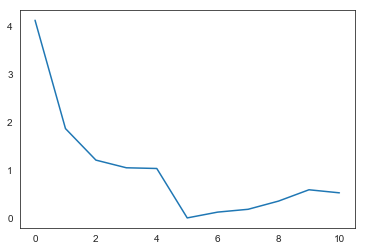

In [21]:
# how many components should I choose
X = features
Cx = np.cov(StandardScaler().fit_transform(X).T)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.show()

In [22]:
# PCA explained variance ratio
sklearn_pca = PCA(n_components=1)
sklearn_pca.fit(X)
print(sklearn_pca.explained_variance_ratio_)

[0.99995478]
